MODULE 3 | LESSON 1


---

# **Portfolio Returns and Variance**

|  |  |
|:---|:---|
|**Reading Time** | 2h  |
|**Prior Knowledge** | python, returns, variance, diversification  |
|**Keywords** | returns, logarithm, percent, matrix notation, distribution, annualize, geometric mean, arithmetic mean, portfolio variance, correlation, weights|

---

* 在这节课里，我们会学几个重要的理财技能：
* 算投资的回报（有两种常见的回报计算方式：百分比回报和对数回报），它们各自有什么特点，什么时候该用哪种。
* 回报换算成年化回报（比如你投资3个月赚了3%，那全年大概能赚多少？）
* 我们还会学怎么计算一个投资组合的“波动风险”（也就是组合的方差）。我们会看看，一个组合的整体风险，怎么受到每个资产的风险、它们在组合里的占比、以及它们之间的关联（相关性）影响。

## **1. Portfolio Returns 投资组合（portfolio）收益是怎么计算的**

🔹 什么是投资组合收益？

假设你买了几种资产，比如苹果、特斯拉和微软的股票。每种股票每天都有涨跌，也就是有个“收益率”（return）。你给每只股票分配一个“权重”（weight），比如你把总资金的 50% 投在苹果，30% 投在特斯拉，20% 投在微软。

投资组合的总收益率，就是这些单独收益率的加权平均：
$$
r_p = w_1 \cdot r_1 + w_2 \cdot r_2 + w_3 \cdot r_3
$$
$$
r_{p} = \sum_{1}^{n} w_{i} \cdot r_{i}
$$
where
* $r_{p}$: portfolio returns
* $r_{i}$: asset $i$ returns
* $w_{i}$: the weight of asset $i$

We should have an additional constraint in mind:
$$
\sum_{1}^{n} w_{i} = 1
$$

and for the purposes of this lesson, we will also assume that shorting is not allowed:
$$
w_{i} > 0
$$

Essentially, the return of the portfolio $r_{p}$ is a linear combination of the returns of each asset. By construction, we have that $r_{p} \in \text{span}(r_{i})$ for every combination of the weights. That means that the assets that an investor chooses are the basis (in a Linear Algebra context) of the portfolio.

Let's now write the portfolio returns in the format we will be using for the rest of the lesson and make the notation clear:

$$
r_{p} = \mathbf{r} \cdot \mathbf{w}
$$

with
$$ \mathbf{r} = \begin{bmatrix} r_1 & r_2 & \dots & r_n \end{bmatrix} \text{ , } \mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix}$$

and each $r_{i}$ is a vector that represents the returns of each asset across time $t$:
$$
r_{i} = \begin{bmatrix} r^i_{t_{1}} \\ r^i_{t_{2}} \\ \vdots \\ r^i_{t_{m}} \end{bmatrix}
$$



Using $1$ as the sum of all weights has an intuitive explanation: we construct the portfolio by using a percentage of each asset (the weights) until we use the entire amount ($1$ means $100\%$). What does it mean if we break that constraint?


**Exercise 1:**

Use your favorite finance textbook and online resources in researching the constraint $\sum_{1}^{n} w_{i} = 1$. What would it mean for a portfolio if $\sum_{1}^{n} w_{i} = 2$ ? Answer the same question but now for $\sum_{1}^{n} w_{i} = 0$. Initiate a discussion in the forum explaining your understanding.



你要用一个常见的金融数据网站（比如 Yahoo Finance）来下载一些真实的资产数据，然后计算这些资产的日收益率。下面是每一行代码在干嘛的通俗解释：

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
assets = ['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL'] # Assets for portfolio
w = np.array([0.1, 0.2, 0.1, 0.4, 0.2]) #  # 每只股票在你投资组合里的占比（总和为 1）

asset_prices = yf.download(assets, start='2018-01-01', end='2023-01-01', auto_adjust = False)['Adj Close']
# 用 yfinance 从 2018 年到 2023 年拉这五家公司每天的收盘价格数据。

asset_prices.index = pd.to_datetime(asset_prices.index) # Setting index as datetime object

r = asset_prices.pct_change().dropna() # 这里 .pct_change() 是计算每天的百分比涨跌幅（收益率）。比如从100涨到105就是+5%。


r.head() # Each column is r_{i}

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2018-01-03,-0.000174,0.012775,0.017061,0.004654,-0.010233
2018-01-04,0.004645,0.004476,0.003884,0.008802,-0.008290
2018-01-05,0.011386,0.016163,0.013260,0.012398,0.006230
2018-01-08,-0.003714,0.014425,0.003531,0.001020,0.062638
2018-01-09,-0.000115,0.004676,-0.001274,-0.000680,-0.008085


In [27]:
#w = np.array([0.1, 0.2, 0.1, 0.4, 0.2]) #  # 每只股票在你投资组合里的占比（总和为 1）
r_port = r @ w # Creating portfolio returns
r_port.name = 'portfolio_returns'
r_port.head()

Date
2018-01-03    0.004059
2018-01-04    0.003611
2018-01-05    0.011902
2018-01-08    0.015802
2018-01-09   -0.001093
Name: portfolio_returns, dtype: float64

## **2 Types of Returns**



### **2.1 Percentage Returns**



2 类收益率

我们在上一节聊的是 每日组合的百分比变化，但实际金融中常用两种收益率：百分比（简单）收益和对数收益。

2.1 百分比收益（Arithmetic/Percent Return）

$$
r_t = \frac{p_t - p_{t-1}}{p_{t-1}}
$$
	•	啥意思？ 就是价格涨跌除以之前的价格，最直观。
	•	优点？ 易理解，也方便组合计算（加权平均）。
	•	缺点？
	•	不能累加。 如果第一月涨 20%，第二月跌 18%，总收益 ≠ 20% – 18% = 2%。
实际是：100→120（涨20%），再跌18%→约98.4，不是102。
	•	不对称。 跌幅最多是 –100%（价值归零），但涨幅没有上限。

**Exercise 2:**

Create a custom function in Python that given a price array (for example `asset_prices['MSFT']`), will return the array of the arithmetic returns. You are not allowed to use any existing Python functions. Cross-check the results with the ones produced by using the `pct_change` pandas function.


### **2.2 Logarithmic Returns**
⸻

🧠 为什么对数收益率可以直接加起来？

对数收益率的“加性”特性来自于对数函数的一个基本性质：

\log(ab) = \log(a) + \log(b)

好，现在你拿出你的基金净值或者股票价格，我们来模拟个例子。

⸻

🧮 假设：

某股票每天的收益率如下：
	•	第一天从 100 涨到 105 → 收益率 = \frac{105}{100} = 1.05
	•	第二天从 105 涨到 110 → 收益率 = \frac{110}{105} = 1.0476

⸻

✅ 普通收益率总收益率：

\frac{110}{100} = 1.10 = 10\%

⸻

✅ 对数收益率：

我们用自然对数（ln）来表示每天的对数收益率：
	•	第一天： \ln(1.05)
	•	第二天： \ln(1.0476)

加起来：

\ln(1.05) + \ln(1.0476) = \ln(1.05 \times 1.0476) = \ln(1.10)

这正好是从 100 涨到 110 的对数收益率。

⸻

💡 结论：

对数收益率之所以可以“加起来”，是因为它把“连乘”（每天收益相乘）转换成“连加”。这就像把烦人的乘法考试交给了加法的小学生，完美避坑。

⸻

如果这还不够浪漫，你可以想象对数收益率是金融界的小精灵，擅长悄悄地把复杂的乘法变成简单的加法，方便你撸代码算总收益。多贴心。

**Exercise 3:**

编写一个Python 函数，输入一个价格数组（比如 asset_prices['MSFT']），输出对应的对数收益率数组（logarithmic returns）。

In [28]:
import numpy as np
import pandas as pd

def compute_log_returns(price_series):
    """
    Compute logarithmic returns from a pandas Series of prices.

    Parameters:
        price_series (pd.Series): A time series of asset prices.

    Returns:
        pd.Series: Logarithmic returns of the price series.
    """
    return np.log(price_series / price_series.shift(1)).dropna()

# Assume asset_prices is a DataFrame containing MSFT prices
log_returns = compute_log_returns(asset_prices['MSFT'])
print(log_returns.head())

Date
2018-01-03    0.004643
2018-01-04    0.008763
2018-01-05    0.012322
2018-01-08    0.001020
2018-01-09   -0.000680
Name: MSFT, dtype: float64


In [29]:
print("The 25th quantile is: ", r['MSFT'].quantile(0.25),"\nThe 75th quantile is: ", r['MSFT'].quantile(0.75))

The 25th quantile is:  -0.008331276012851413 
The 75th quantile is:  0.0109378502688528




上面的结果说明了一个现象：很多时候，每日的收益率大概就在 1% 左右。然后，对于“对数收益率”和“百分比收益率”这两个概念，它们之间的关系是这样的：

$$
r_{\text{log}} = \ln\left(\frac{p_t}{p_{t-1}}\right) =
\ln\left(\frac{p_t - p_{t-1} + p_{t-1}}{p_{t-1}}\right) =
\ln(1 + r_{\text{pct}})
$$

意思是：“对数收益率”其实就是 “百分比收益率 + 1” 之后取对数。数学上，没毛病。

接下来用泰勒展开（这玩意儿是数学里的一个套路，拿来近似复杂函数）把这个公式展开，就变成这样了：

$$
r_{\text{log}} = \ln(1 + r_{\text{pct}}) = r_{\text{pct}} - \frac{r_{\text{pct}}^2}{2} + \frac{r_{\text{pct}}^3}{3} - \frac{r_{\text{pct}}^4}{4} + \dots
$$

既然我们看到每日收益都很小（小于 0.01），那么后面那些高次幂（立方、四次方……）的项基本可以忽略不计。于是就简化为：

$$
r_{\text{log}} = r_{\text{pct}} - \frac{r_{\text{pct}}^2}{2} + O(R^3)
$$

这里的 O(R^3) 表示“还有一些更高阶的项，但它们都小得可以忽略”。

如果我们对上面这个公式的两边都取期望值（就是“平均一下”），再动点代数手术，就会得到这个结论：

$$
\mathbb{E}(r_{\text{log}}) \approx \mathbb{E}(r_{\text{pct}}) - \frac{\sigma^2}{2}
$$

其中 \sigma^2 是百分比收益率的方差，也就是衡量“波动性”的指标。

这个公式告诉我们两个非常重要的事情：
	1.	当市场波动小的时候（比如你的股票不怎么蹦跶），对数收益率和百分比收益率几乎一样。（这是 Ruppert 和 Matteson 这俩学者说的，不是我瞎编的）
	2.	如果你把数据按更长时间来看（比如从按天看变成按月看），那么收益的绝对值就会变大，波动也会变大，对数收益和百分比收益的差距也会拉大。



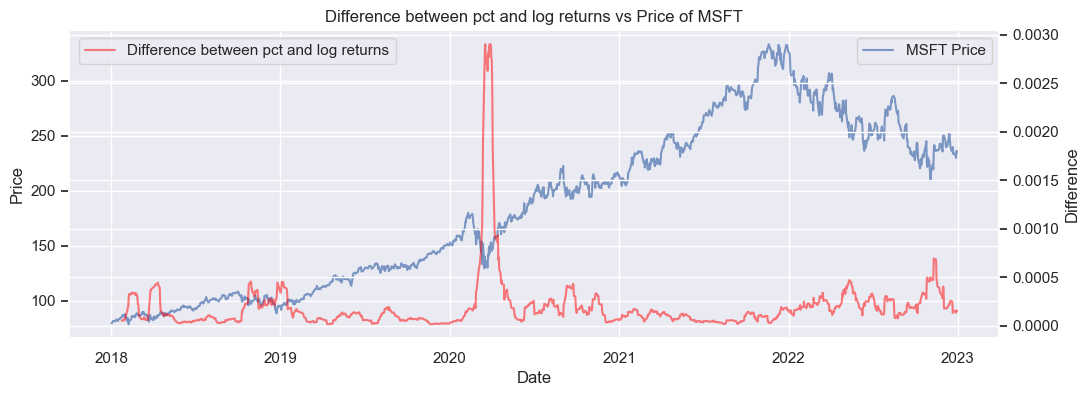

In [30]:
# 计算微软（MSFT）每日的百分比收益率，即 (今天的价格 - 昨天的价格) / 昨天的价格
pct_returns_msft = asset_prices['MSFT'].pct_change().dropna()

# 计算每日对数收益率，即 ln(今天的价格 / 昨天的价格)
log_returns_msft = np.log(asset_prices['MSFT'] / asset_prices['MSFT'].shift(1)).dropna()

# 计算15日滑动平均的百分比收益率，用来平滑数据看趋势
pct_change_msft_roll_mean = pct_returns_msft.rolling(15).mean()

# 计算15日滑动平均的对数收益率
log_returns_msft_roll_mean = log_returns_msft.rolling(15).mean()

# 创建图像和坐标轴，设置图的大小
fig, ax = plt.subplots(figsize=(12,4))

# 设置主标题
ax.set_title('Difference between pct and log returns vs Price of MSFT')

# 画出微软的股价曲线，设置透明度方便叠加其他图线
ax.plot(asset_prices['MSFT'], label='MSFT Price', alpha=0.7)

# 设置左边y轴的标签为股价
ax.set_ylabel('Price')

# 设置x轴的标签为时间
ax.set_xlabel('Date')

# 显示图例（说明线条含义）
ax.legend()

# 创建一个右侧y轴，用来显示收益率的差异
ax2 = ax.twinx()

# 画出百分比收益率和对数收益率的滑动平均差值，颜色设置为红色
ax2.plot((pct_change_msft_roll_mean - log_returns_msft_roll_mean),
         color='red', alpha=0.5, label='Difference between pct and log returns')

# 设置右侧y轴的标签为差异
ax2.set_ylabel('Difference')

# 设置右侧图例的位置
ax2.legend(loc=(0.01, 0.89))

# 显示图像
plt.show()

Figure 1 illustrates the difference between the pct and log returns. During low vol periods, both returns are very close, whereas during the March 2020 market crash, this difference becomes pronounced.

**Exercise 4:**

MSFT is a low-volatility stock. Recreate Figure 1 but now use TSLA in order to illustrate clearly in which periods the two returns diverge.

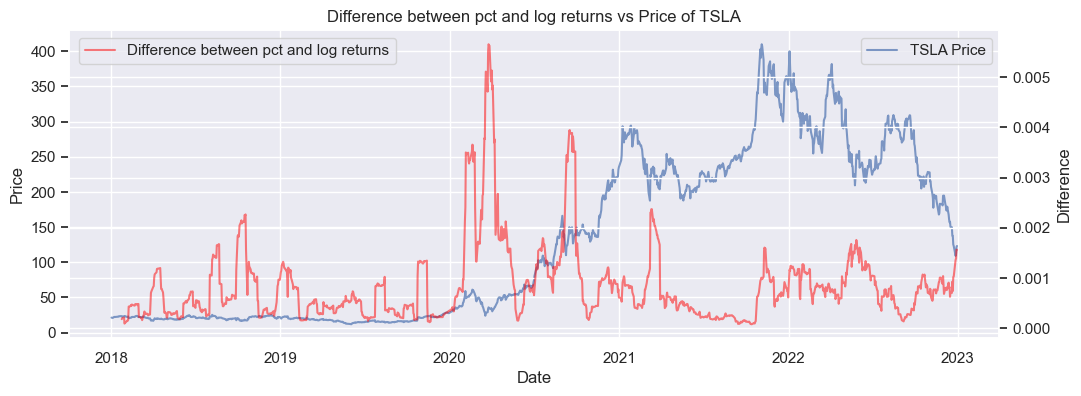

In [31]:
# 计算微软（MSFT）每日的百分比收益率，即 (今天的价格 - 昨天的价格) / 昨天的价格
pct_returns_msft = asset_prices['TSLA'].pct_change().dropna()

# 计算每日对数收益率，即 ln(今天的价格 / 昨天的价格)
log_returns_msft = np.log(asset_prices['TSLA'] / asset_prices['TSLA'].shift(1)).dropna()

# 计算15日滑动平均的百分比收益率，用来平滑数据看趋势
pct_change_msft_roll_mean = pct_returns_msft.rolling(15).mean()

# 计算15日滑动平均的对数收益率
log_returns_msft_roll_mean = log_returns_msft.rolling(15).mean()

# 创建图像和坐标轴，设置图的大小
fig, ax = plt.subplots(figsize=(12,4))

# 设置主标题
ax.set_title('Difference between pct and log returns vs Price of TSLA')

# 画出微软的股价曲线，设置透明度方便叠加其他图线
ax.plot(asset_prices['TSLA'], label='TSLA Price', alpha=0.7)

# 设置左边y轴的标签为股价
ax.set_ylabel('Price')

# 设置x轴的标签为时间
ax.set_xlabel('Date')

# 显示图例（说明线条含义）
ax.legend()

# 创建一个右侧y轴，用来显示收益率的差异
ax2 = ax.twinx()

# 画出百分比收益率和对数收益率的滑动平均差值，颜色设置为红色
ax2.plot((pct_change_msft_roll_mean - log_returns_msft_roll_mean),
         color='red', alpha=0.5, label='Difference between pct and log returns')

# 设置右侧y轴的标签为差异
ax2.set_ylabel('Difference')

# 设置右侧图例的位置
ax2.legend(loc=(0.01, 0.89))

# 显示图像
plt.show()


❓ Exercise 5: 为什么用算术平均的 log return 不能直接得出组合收益率？

翻译成人话：

你可能以为：
“组合的 log 收益率 = 各资产的 log 收益 × 各自权重，然后加起来”，对吧？

错！这跟现实组合的增长方式不匹配。组合实际是资产“价格的加权和”，不是 log return 的加权和。log return 的累积性适用于乘法结构，而组合价格是加法合成的，所以平均 log return 不会帮你还原出组合真实的增长。

数学不骗你，你骗你自己。


💼 Exercise 6: 计算组合的 log 收益率，并说明 log return 有啥用

你要做的：
	1.	给定一个 asset_weights（比如字典 {'AAPL': 0.4, 'MSFT': 0.6}），然后：
	2.	每天算组合总价值 = 每只股票价格 × 对应权重，加起来。
	3.	然后用 np.log(portfolio_value / portfolio_value.shift(1)) 算 log return。

为什么要用 log return？
	•	可以把多个 log return 加起来当作“总收益”，很方便做时间维度的累积。
	•	在做组合优化、风险模型、GARCH 之类的数学黑魔法时，log return 更合适。
	•	用来训练模型也更稳定（不像百分比 return 那样经常发疯）。

In [32]:
# 假设你已经有这个字典
weights = {'AAPL': 0.4, 'MSFT': 0.3, 'TSLA': 0.3}

# 把权重转成 Series，方便跟 DataFrame 做矩阵乘法
weight_series = pd.Series(weights)

# 取出你要的资产列
selected_assets = asset_prices[weights.keys()]

# 计算每日组合价值（就是每行 * 权重，再加总）
portfolio_value = selected_assets.dot(weight_series)
portfolio_value

# 对数收益率：ln(Pt / Pt-1)
portfolio_log_returns = np.log(portfolio_value / portfolio_value.shift(1)).dropna()
portfolio_log_returns

Date
2018-01-03    0.000913
2018-01-04    0.005005
2018-01-05    0.011151
2018-01-08    0.007612
2018-01-09   -0.001535
                ...   
2022-12-23   -0.004058
2022-12-27   -0.034884
2022-12-28   -0.007882
2022-12-29    0.038882
2022-12-30    0.001163
Length: 1258, dtype: float64


**Exercise 7:**

Using the provided `asset_prices` DataFrame, calculate the cumulative return of each asset over the entire period using three different methods:

1. By using the daily percent returns array of each asset (hint: you will need to use the `prod` function).
2. By using the daily log returns.
3. By using the asset prices array.

In [33]:
#👉 解释：每天收益率加1再连乘，就像利滚利一样，最后减1得到总收益。
#计算每日百分比收益率
pct_returns = asset_prices.pct_change().dropna()
# 计算每个资产的累计收益
cumulative_return_pct = (1 + pct_returns).prod() - 1
cumulative_return_pct

#方法2：用对数收益
log_returns = np.log(asset_prices / asset_prices.shift(1)).dropna()
cumulative_return_log = np.exp(log_returns.sum()) - 1

#方法3：直接用价格 👉 解释：最后一个价格 / 第一个价格，减去1，得到的是总涨幅。
cumulative_return_price = asset_prices.iloc[-1] / asset_prices.iloc[0] - 1

cumulative_df = pd.DataFrame({
    'From pct return': cumulative_return_pct,
    'From log return': cumulative_return_log,
    'From price': cumulative_return_price
})

print(cumulative_df)

        From pct return  From log return  From price
Ticker                                              
AAPL           2.172855         2.172855    2.172855
AMZN           0.412940         0.412940    0.412940
GOOGL          0.644226         0.644226    0.644226
MSFT           1.962922         1.962922    1.962922
TSLA           4.764515         4.764515    4.764515


算术平均会误导 ， 考虑复利用几何平均

In [34]:
percent_returns_tsla = asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"].pct_change().dropna() # Calculating daily percent returns
geom_mean_tsla_1 = ((1 + percent_returns_tsla).prod() ** (1/len(percent_returns_tsla))) - 1 # Calculating geometric mean

log_returns_tsla = np.log(asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"] / asset_prices['TSLA'].loc["2020-06-01":"2020-09-30"].shift(1)).dropna() # Calculating daily log returns
arithmetic_mean_tsla_1 = log_returns_tsla.mean() # Calculating arithmetic mean

print("Logarithm of geometric Mean of TSLA + 1: ", np.log(geom_mean_tsla_1 + 1))
print("Arithmetic Mean of TSLA: ", arithmetic_mean_tsla_1)

Logarithm of geometric Mean of TSLA + 1:  0.010242784447195914
Arithmetic Mean of TSLA:  0.010242784447195903


### **3.3 选择合适的百分比回报率均值**
分析投资回报时，选择合适的均值至关重要：
- **算术平均**用于统计模型和组合优化中的预期回报计算，它表示不考虑复利的每期平均回报。在预测未来回报、计算组合预期回报和风险评估时必不可少。
- **几何平均**准确反映多期复利增长率，适合评估投资的历史表现。但不可用于统计建模或预期回报预测，因为它会低估未来表现。

总结：几何平均体现实际复利增长，算术平均是统计分析和组合决策的基础指标。

---

### **4. 百分比回报率的年化**
年化回报率让不同周期的投资可比。对于百分比回报率（考虑复利效应），年化公式为：

$$
R_{\text{Annual}} = (1 + r_{\text{GeomMean}})^{N} - 1
$$

其中：
- $R_{\text{Annual}}$ = 年化回报率
- $N$ = 年交易周期数（股票常用252天，连续交易资产用365天）

---

### **5. 对数回报率的年化**
对数回报率因可加性更易处理：
- 直接年化：
  $$
  R_{\text{Annual,Log}} = N \cdot r_{\text{ArithMean}}
  $$
- 转回百分比回报：
  $$
  R_{\text{Annual}} = e^{N \cdot r_{\text{ArithMean}}} - 1
  $$

**微软(MSFT)年化计算示例：**

In [35]:
geom_mean_msft = ((1 + pct_returns_msft).prod() ** (1/len(pct_returns_msft))) - 1
# 几何平均 - 用于百分比回报年化

annual_pct_returns_msft = (1 + geom_mean_msft) ** 252 - 1
# 百分比年化回报 - 考虑复利

annual_log_returns_msft = log_returns_msft.mean() * 252
# 对数年化回报 - 直接乘252，因为它是加性的


print("MSFT年化百分比回报: ", annual_pct_returns_msft)
print("MSFT年化对数回报: ", annual_log_returns_msft)

# 假设你已经有 TSLA 的 daily percent 和 log return 数据：
# pct_returns_tsla 和 log_returns_tsla 是 pandas Series




MSFT年化百分比回报:  0.42034696436395613
MSFT年化对数回报:  0.3509011828681102



**练习 9：**
计算特斯拉(TSLA)的年化百分比回报和对数回报。

---

### **6. 组合方差**
#### **6.1 基础概念**
风险衡量需关注组合方差：
- 单一资产：用回报标准差衡量风险
- 资产组合：用协方差矩阵计算风险

**组合方差公式（矩阵形式）：**
$$
\sigma^{2}_{p} = \mathbf{w}^{T} \cdot \Sigma \cdot \mathbf{w}
$$
其中：
- $\mathbf{w}$ = 权重向量
- $\Sigma$ = 协方差矩阵

**Python实现：**

In [36]:
port_var = w.T @ r.cov() @ w  # 组合方差
port_std = np.sqrt(port_var)  # 组合标准差
print("组合方差:", port_var)
print("组合标准差:", port_std)


组合方差: 0.00041107135802445405
组合标准差: 0.020274894772216553



#### **6.2 相关系数的影响**
相关系数$\rho$显著影响组合风险：
- 方差分解公式：
  $$
  \sigma^{2}_{p} = \sum w_i^2\sigma_i^2 + \sum \sum_{i \neq j} w_i w_j \rho_{ij} \sigma_i \sigma_j
  $$
- 关键结论：$\rho_{ij}$增大 → 组合方差增大（系统性风险信号）

**相关系数影响可视化：**

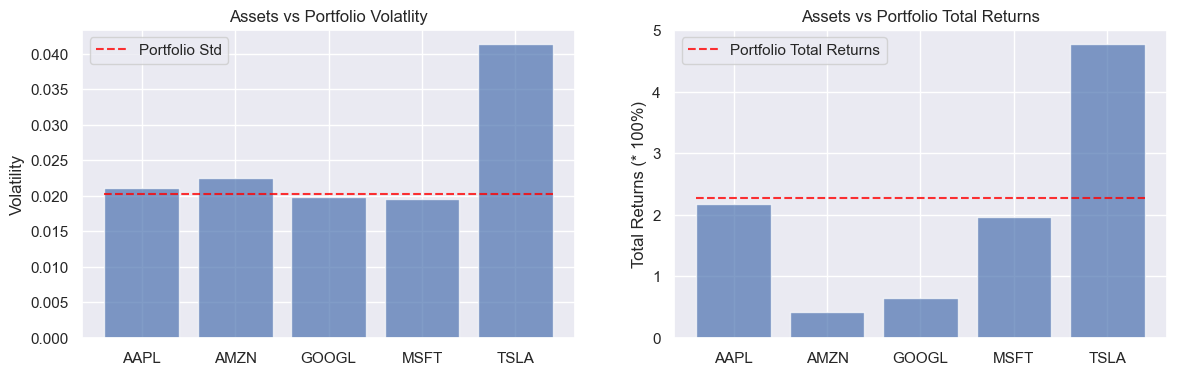

In [37]:
# Figure 2
# We will visualize the asset's std and returns vs portfolio

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

ax1.bar(x = r.columns, height = r.std(), alpha = 0.7)
ax1.hlines(y = port_std, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Std")
ax1.set_title("Assets vs Portfolio Volatlity")
ax1.set_ylabel("Volatility")
ax1.legend()

ax2.bar(x = r.columns, height = (r + 1).prod() - 1, alpha = 0.7) # Make sure you can explain why the `(r + 1).prod() - 1` is the total return
ax2.hlines(y = (r_port + 1).prod() - 1, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Total Returns")
ax2.set_title("Assets vs Portfolio Total Returns")
ax2.set_ylabel("Total Returns (* 100%)")
ax2.legend()

plt.show()

#结论：资产相关性越高，组合风险越大

**练习 10：**
构建方差接近零且回报为正的组合（使用≥2种资产），在论坛分享方案或解释失败原因。

---

### **7. 组合权重优化**
#### **有效前沿（Efficient Frontier）**
权重选择平衡风险与回报，有效前沿是最优组合集合：

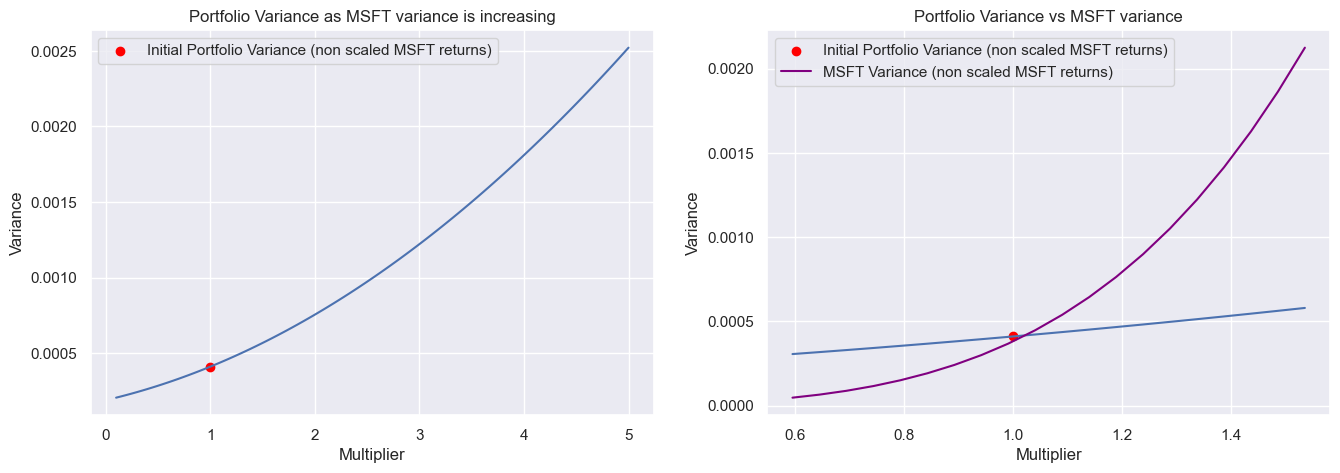

In [39]:
# Figure 3
multipliers = np.linspace(0.1,5,100)
# 创建一个从0.1到5的等间距数组，准备用来“放大/缩小” MSFT 的收益，从而影响其方差

portfolio_variances = []   # 用于记录不同情况下的组合方差
msft_variances = []        # 用于记录每次变换后 MSFT 的自身方差

for multiplier in multipliers:
    temp_returns = r * np.array([1, 1, 1, multiplier, 1])
    # 对收益矩阵r进行修改：只有 MSFT 的收益乘以 multiplier，其他资产收益不变

    temp_port_variance = w.T @ temp_returns.cov() @ w
    # 使用协方差矩阵公式计算新的组合方差

    msft_variances.append((temp_returns['MSFT'] * multiplier).var())
    # 记录此时的 MSFT 自身方差（其实乘 multiplier 两次，进一步放大）

    portfolio_variances.append(temp_port_variance)
    # 记录组合方差

    assert np.allclose(r.corr(), temp_returns.corr())
    # 保证相关性矩阵没被改变（乘一个倍数不会影响 Pearson 相关性）

# 创建图像
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

# 左图：显示组合方差随着 multiplier 增加而增加
ax1.plot(multipliers, portfolio_variances)
ax1.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax1.set_title("Portfolio Variance as MSFT variance is increasing")
ax1.set_xlabel("Multiplier")
ax1.set_ylabel("Variance")
ax1.legend()

# 右图：对比 MSFT 方差 和 组合方差 （Zoom in 细节）
ax2.plot(multipliers[10:30], portfolio_variances[10:30])
ax2.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax2.plot(multipliers[10:30], msft_variances[10:30], color = 'purple', label = "MSFT Variance (non scaled MSFT returns)")
ax2.set_title("Portfolio Variance vs MSFT variance")
ax2.set_xlabel("Multiplier")
ax2.set_ylabel("Variance")
ax2.legend()

plt.show()


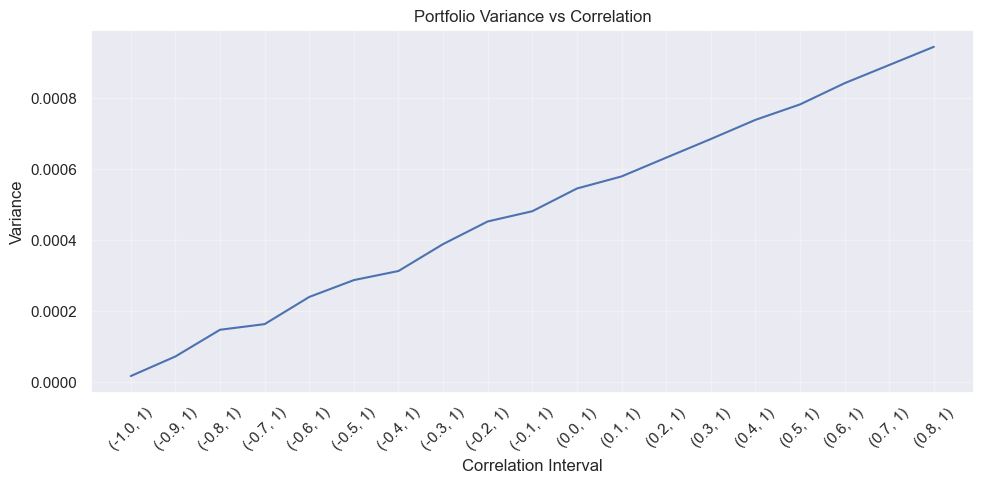

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 资产数量设为100
n_assets = 100

# 使用狄利克雷分布生成投资权重，确保所有权重加起来是1（组合配置）
w = np.random.dirichlet(np.ones(n_assets), size=1)[0]

# 使用卡方分布生成每个资产的方差，模拟市场真实波动性分布
degrees_of_freedom = 8
variances = np.random.chisquare(df=degrees_of_freedom, size=n_assets)

# 将方差标准化到最大值为 0.003 的范围
variances = variances / np.max(variances) * 0.003
std_devs = np.sqrt(variances)

# 创建标准差矩阵 D（对角矩阵）
D = np.diag(std_devs)

# 构建多个相关性矩阵，每个矩阵的最小相关性逐步提高，从 -1 到 0.8
corr_matrices = []
for j in range(19):  # 共构建19个相关性矩阵
    R = np.zeros((n_assets, n_assets))  # 初始化空矩阵
    low_boundary = -1 + j * 0.1  # 当前相关性的最小值
    for i in range(1, n_assets):
        # 为矩阵下三角随机填充相关性（low_boundary 到 1 之间）
        R[i, :i] = np.random.uniform(low_boundary, 1, i)
    R = R + R.T  # 对称化（下三角镜像到上三角）
    np.fill_diagonal(R, 1)  # 对角线设为1（资产和自身的相关性为1）
    corr_matrices.append(R)

# 计算每个相关性矩阵对应的投资组合方差
portfolio_variances = []
for R in corr_matrices:
    # 使用 Σ = D·R·D 算组合协方差矩阵，然后求组合方差：wᵀ·Σ·w
    portfolio_variance = w.T @ D @ R @ D @ w
    portfolio_variances.append(portfolio_variance)

# 构建横轴标签，表示当前相关性范围
x_labels = [str((round(-1 + j * 0.1, 1), 1)) for j in range(19)]

# 画图：组合方差 vs 相关性范围
plt.figure(figsize=(10, 5))
plt.plot(portfolio_variances)
plt.title("Portfolio Variance vs Correlation")
plt.xlabel("Correlation Interval")
plt.ylabel("Variance")
plt.xticks(ticks=range(19), labels=x_labels, rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


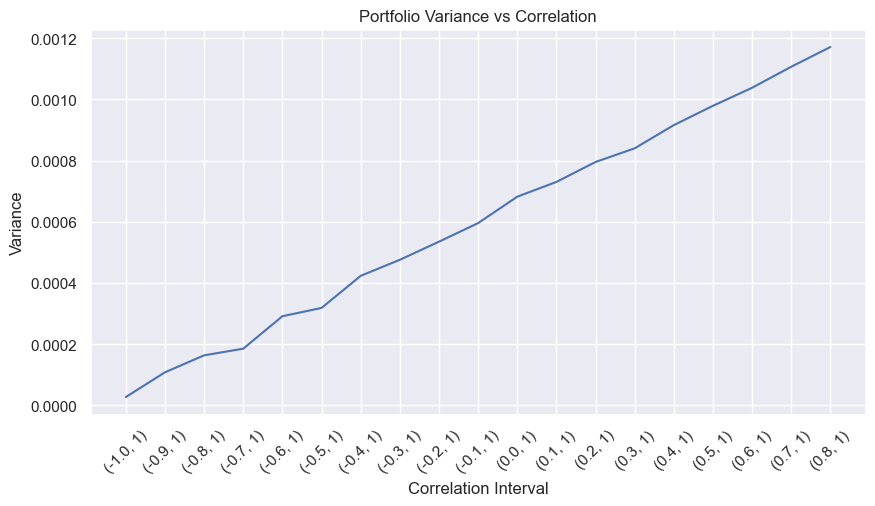

In [40]:
n_assets = 100

w = np.random.dirichlet(np.ones(n_assets), size=1)[0] # Simulate weights using Dirichlet distribution

degrees_of_freedom = 8  # Adjust the skewness of the Chi-square distribution
variances = np.random.chisquare(df=degrees_of_freedom, size=n_assets)
variances = variances / np.max(variances) * 0.003  # Scale to max variance of 0.003
std_devs = np.sqrt(variances)
D = np.diag(std_devs)

# Construct the correlation matrices
corr_matrices = []
for j in range(19):
    R = np.zeros((n_assets, n_assets))
    low_boundary = -1 + j*0.1
    for i in range(1, n_assets):
        R[i, :i] = np.random.uniform(low_boundary, 1, i) # Creating the lower triangular part of the correlation matrix

    R = R + R.T # Comment this line yourself
    np.fill_diagonal(R, 1)
    corr_matrices.append(R)

# Calculate portfolio variances
portfolio_variances = []
for R in corr_matrices:
    portfolio_variance = w.T @ D @ R @ D @ w
    portfolio_variances.append(portfolio_variance)

# Plot portfolio variance against correlations
x_labels = [str((round(-1 + j*0.1, 1), 1)) for j in range(19)]
plt.figure(figsize = (10,5))
plt.plot(portfolio_variances)
plt.title("Portfolio Variance vs Correlation")
plt.xlabel("Correlation Interval")
plt.ylabel("Variance")
plt.xticks(ticks = range(19), labels = x_labels, rotation = 45)
plt.show()

7. Portfolio Weights


/var/folders/rq/7sbky2g96jdgj8pp88lw9tnw0000gn/T/ipykernel_74348/2118754109.py:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_ret = expected_returns[max_ret_idx]


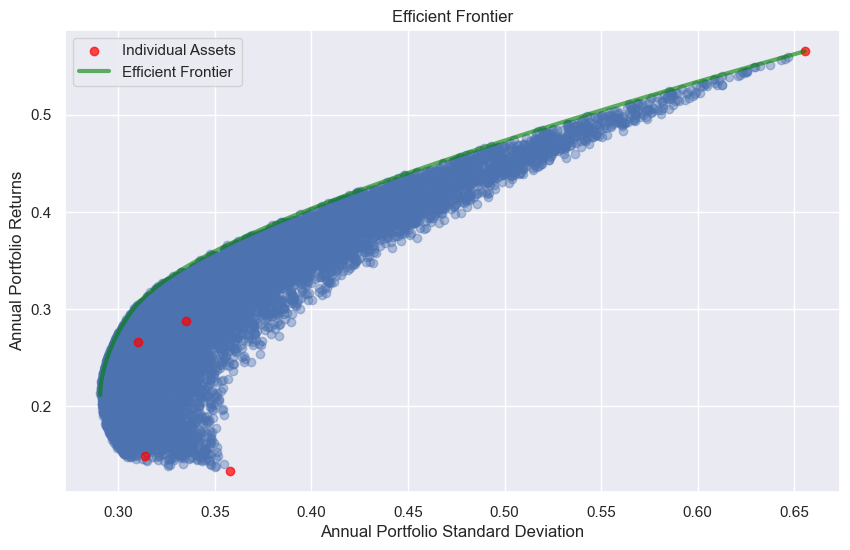

In [44]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假设我们有5个资产（如股票、债券、加密货币等）
weights = np.random.dirichlet(np.ones(5)*0.7, size=20000)
# 使用 Dirichlet 分布生成 2万个随机组合（权重和为1）

assert np.isclose(np.sum(weights, axis=1), 1).all()
# 确保每组权重加起来都正好等于1

# 获取协方差矩阵（年化），用于组合波动计算
cov_matrix_ret = r.cov() * 252
# 获取年化预期收益（每日均值 * 252）
expected_returns = r.mean() * 252

# 用于存储每组组合的收益与标准差
eff_front_dict = {}

# 计算每组组合的年化收益与波动率
for w in weights:
    port_ret = expected_returns @ w.T
    port_std = np.sqrt(w.T @ cov_matrix_ret @ w)
    eff_front_dict[str(list(w))] = [port_ret, port_std]

# 转为 DataFrame 结构，方便后续可视化
eff_frontier_dataframe = pd.DataFrame(
    eff_front_dict,
    index=['Returns', 'Standard Deviation']
).T

# 工具函数：根据给定权重，返回组合收益与波动率
def get_portfolio_stats(weights, expected_returns, cov_matrix):
    port_ret = expected_returns @ weights
    port_std = np.sqrt(weights.T @ cov_matrix @ weights)
    return port_ret, port_std

# 工具函数：用于最大化 Sharpe Ratio（负号是为了最小化函数）
def negative_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_ret, port_std = get_portfolio_stats(weights, expected_returns, cov_matrix)
    sharpe_ratio = (port_ret - risk_free_rate) / port_std
    return -sharpe_ratio

# 工具函数：用于计算组合的最小波动率（用于优化）
def minimum_variance(weights, expected_returns, cov_matrix):
    return get_portfolio_stats(weights, expected_returns, cov_matrix)[1]

# 计算在特定预期收益下风险最小的权重组合
def efficient_frontier_point(expected_returns, cov_matrix, target_return):
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # 权重和为1
        {'type': 'eq', 'fun': lambda w: get_portfolio_stats(w, expected_returns, cov_matrix)[0] - target_return}  # 达到目标收益
    )
    bounds = tuple((0, 1) for _ in range(n_assets))  # 权重在 0~1 之间

    result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return result.x  # 返回最优权重

# 构造有效前沿曲线（多个目标收益）
def get_efficient_frontier(expected_returns, cov_matrix, n_points=100):
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    # 找最小方差组合
    min_var_result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    min_ret, min_std = get_portfolio_stats(min_var_result.x, expected_returns, cov_matrix)

    # 最大预期收益（在所有资产中选一个）
    max_ret_idx = np.argmax(expected_returns)
    max_ret = expected_returns[max_ret_idx]

    # 构造目标收益列表
    target_returns = np.linspace(min_ret, max_ret, n_points)
    efficient_portfolios = []

    for target_return in target_returns:
        weights = efficient_frontier_point(expected_returns, cov_matrix, target_return)
        ret, std = get_portfolio_stats(weights, expected_returns, cov_matrix)
        efficient_portfolios.append([std, ret])

    return np.array(efficient_portfolios)

# 计算有效前沿点
efficient_points = get_efficient_frontier(expected_returns, cov_matrix_ret)

# 绘图
plt.figure(figsize=(10, 6))

# 所有随机组合的收益-波动散点图
plt.scatter(
    x=eff_frontier_dataframe['Standard Deviation'],
    y=eff_frontier_dataframe['Returns'],
    alpha=0.4
)

# 所有单个资产（点状红色）
plt.scatter(
    x=r.std() * np.sqrt(252),
    y=expected_returns,
    color='red',
    label="Individual Assets",
    alpha=0.7
)

# 有效前沿（橙色曲线）
plt.plot(
    efficient_points[:, 0],
    efficient_points[:, 1],
    'green',
    linewidth=3,
    label='Efficient Frontier',
    alpha=0.6
)

plt.title("Efficient Frontier")
plt.xlabel("Annual Portfolio Standard Deviation")
plt.ylabel("Annual Portfolio Returns")
plt.legend()
plt.grid(True)
plt.show()


**Exercise 9:**

Calculate the annual returns for TSLA, both for percent and log returns.

In [ ]:
r_port.std() # Calculating standard deviation of portfolio returns

In Financial Markets, we also expressed portfolio variance as:

$$
\sigma^{2}_{p} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \text{Cov}(r_i, r_j)
$$

Where:

* $w_i$ = the portfolio weight of the $i$th asset  
* $\text{Cov}_{i,j}$ = the covariance of two assets, which can be expressed as $\rho_{_{(i,j)}} \sigma_i \sigma_j$, where $\rho_{_{(i,j)}}$ is the correlation coefficient between the two assets


The formula below is equivalent to the one above, but it is given in matrix notation:

$$
\sigma^{2}_{p} = \mathbf{w}^{T} \cdot \Sigma \cdot \mathbf{w}
$$

Where $\Sigma$ is the portfolio covariance matrix.

In [ ]:
port_var = w.T @ r.cov() @ w # Calculating portfolio variance
port_std = np.sqrt(port_var) # Calculating portfolio standard deviation

print("Portfolio variance: ", port_var)
print("Portfolio standard deviation: ", port_std)

In the above cell, we have showcased that the intuitive and straightforward way of calculating portfolio variance (by computing std directly on the portfolio value) can be replicated by using the covariance matrix and the weights. What we have essentially done is decompose the portfolio variance into several components:
* The weights
* The individual variances
* The between pairs covariances

The above result is somewhat anticipated. If the variance of an asset suddenly changes, the portfolio variance should change. If the weight of a high variance asset changes, then we expect that the portfolio variance will change accordingly. But what about covariances?

In order to see more clearly, we will decompose the covariance matrix a bit more:

$$
\Sigma = D \cdot R \cdot D
$$

where

* D is a diagonal matrix with the standard deviations of each asset
* R is the correlation matrix

The last decomposition shows us that the portfolio variance depends on the pairwise (Pearson) correlations as well.

### **6.2 Impact of Correlation on Portfolio Variance**

Let's write the portfolio variance in its quadratic form but incorporating correlations instead of covariances:

$$
\sigma_p^2 = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n}\sum_{j \neq i}^{n} w_i w_j \sigma_{ij}
$$

By substituting $\sigma_{ij} = \rho_{ij} \sigma_i \sigma_j$, we have:

$$
\sigma_p^2 = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n}\sum_{j \neq i}^{n} w_i w_j \rho_{ij} \sigma_i \sigma_j
$$


To understand how the portfolio variance changes with respect to the correlation $\rho_{ij}$, we will take the partial derivative of $\sigma_p^2$ with respect to $\rho_{ij}$:

$$
\frac{\partial \sigma_p^2}{\partial \rho_{ij}} = \frac{\partial}{\partial \rho_{ij}} \left( \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n}\sum_{j \neq i}^{n} w_i w_j \rho_{ij} \sigma_i \sigma_j \right)
$$

The first sum is independent of $\rho_{ij}$, so its derivative with respect to $\rho_{ij}$ is zero. The derivative of the second sum, with respect to $\rho_{ij}$, gives:

$$
\frac{\partial \sigma_p^2}{\partial \rho_{ij}} = w_i w_j \sigma_i \sigma_j
$$

We have already assumed that $w_{i} > 0$ and we know that standard deviations are always positive. That means that:

$$
\frac{\partial \sigma_p^2}{\partial \rho_{ij}} > 0
$$

Keeping all else the same, if the correlations between two assets increases/decreases, the portfolio variance will increase/decrease. Subsequently, if the correlations of many assets increase at the same time, the portfolio variance will increase faster, and that could be an indication of systemic risk.

Let's showcase some of the above facts with real-world data:

In [ ]:
# Figure 2
# We will visualize the asset's std and returns vs portfolio

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

ax1.bar(x = r.columns, height = r.std(), alpha = 0.7)
ax1.hlines(y = port_std, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Std")
ax1.set_title("Assets vs Portfolio Volatlity")
ax1.set_ylabel("Volatility")
ax1.legend()

ax2.bar(x = r.columns, height = (r + 1).prod() - 1, alpha = 0.7) # Make sure you can explain why the `(r + 1).prod() - 1` is the total return
ax2.hlines(y = (r_port + 1).prod() - 1, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Total Returns")
ax2.set_title("Assets vs Portfolio Total Returns")
ax2.set_ylabel("Total Returns (* 100%)")
ax2.legend()

plt.show()

In Figure 2, the weights we selected (randomly) gave us a portfolio whose volatility is close to that of the majority of the assets, but its returns are well above.

Let's test the relationship of the portfolio variance with the one of a random asset, for example MSFT.

In [ ]:
# Figure 3
multipliers = np.linspace(0.1,5,100) # Creating an array that will use to multiply the MSFT returns array.
portfolio_variances = []
msft_variances = []

for multiplier in multipliers:
  temp_returns = r * np.array([1, 1, 1, multiplier, 1]) # Multiplying MSFT returns with a number in order to scale the returns linearly, changing thus the MSFT variance.
  temp_port_variance = w.T @ temp_returns.cov() @ w # Calculating portfolio variance
  msft_variances.append((temp_returns['MSFT'] * multiplier).var())
  portfolio_variances.append(temp_port_variance)
  assert np.allclose(r.corr(), temp_returns.corr()) # For every new array of returns where MSFT returns are multiplied with a number, the correlations remain the same

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

ax1.plot(multipliers, portfolio_variances)
ax1.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax1.set_title("Portfolio Variance as MSFT variance is increasing")
ax1.set_xlabel("Multiplier")
ax1.set_ylabel("Variance")
ax1.legend()

ax2.plot(multipliers[10:30], portfolio_variances[10:30])
ax2.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax2.plot(multipliers[10:30], msft_variances[10:30], color = 'purple', label = "MSFT Variance (non scaled MSFT returns)")
ax2.set_title("Portfolio Variance vs MSFT variance")
ax2.set_xlabel("Multiplier")
ax2.set_ylabel("Variance")
ax2.legend()

plt.show()

Figure 3 illustrates the effects of the increase of the variance of one asset (MSFT in our case) on the variance of the portfolio. As we expect, the relationship of the portfolio variance and the variance of any asset is quadratic (left graph). The right graph illustrates the difference in risk of holding only one asset vs. a portfolio.

Let's now do the same but for correlations. For simplicity reasons, we will not simulate correlated assets (as you have already seen in Module 2 by using the Cholesky Decomposition), but we will merely create synthetic correlation matrices to show the effects of changing correlations in the portfolio variance.

In the next example, we keep variances and weights constant. We assume 100 assets for which we construct 18 correlation matrices. The 1st corr matrix is allowed to take values from -1 to 1. For each subsequent corr matrix, the low boundary changes as follows $-1 + 0.1 \cdot j$. That means that the 2nd corr matrix will have correlations from -0.9 to 1 and the 18th corr matrix from 0.8 to 1.

In [ ]:
n_assets = 100

w = np.random.dirichlet(np.ones(n_assets), size=1)[0] # Simulate weights using Dirichlet distribution

degrees_of_freedom = 8  # Adjust the skewness of the Chi-square distribution
variances = np.random.chisquare(df=degrees_of_freedom, size=n_assets)
variances = variances / np.max(variances) * 0.003  # Scale to max variance of 0.003
std_devs = np.sqrt(variances)
D = np.diag(std_devs)

# Construct the correlation matrices
corr_matrices = []
for j in range(19):
  R = np.zeros((n_assets, n_assets))
  low_boundary = -1 + j*0.1
  for i in range(1, n_assets):
      R[i, :i] = np.random.uniform(low_boundary, 1, i) # Creating the lower triangular part of the correlation matrix

  R = R + R.T # Comment this line yourself
  np.fill_diagonal(R, 1)
  corr_matrices.append(R)

# Calculate portfolio variances
portfolio_variances = []
for R in corr_matrices:
  portfolio_variance = w.T @ D @ R @ D @ w
  portfolio_variances.append(portfolio_variance)

# Plot portfolio variance against correlations
x_labels = [str((round(-1 + j*0.1, 1), 1)) for j in range(19)]
plt.figure(figsize = (10,5))
plt.plot(portfolio_variances)
plt.title("Portfolio Variance vs Correlation")
plt.xlabel("Correlation Interval")
plt.ylabel("Variance")
plt.xticks(ticks = range(19), labels = x_labels, rotation = 45)
plt.show()

Students who do not have a finance background may not have expected that result. Even when the individual variances and the weights remain constant, changes in correlations affect the portfolio variance. Specifically in our example, the portfolio variance is the lowest when the correlations were sampled from `uniform` distribution and interval $[-1,1]$. As the assets became more correlated, the variance went up as well.

**Exercise 10:**

Select $n \geq 2$ stocks/bonds and construct a portfolio (select appropriate weights) using historical data such that the portfolio variance is $0$ (or really close to $0$ in order to be considered $0$) and the returns are positive (far from $0$). Present your findings in the forum. If you did not find one, present the reasons you could not find one.

In [ ]:
from scipy.optimize import minimize

weights = np.random.dirichlet(np.ones(5)*0.7, size = 20000) # Creating 20000 sets of weights using dirichlet distribution

assert np.isclose(np.sum(weights, axis = 1), 1).all() # Check that each set of weights sum up to 1

eff_front_dict = {}
cov_matrix_ret = r.cov() * 252
expected_returns = r.mean() * 252

# Filling the eff_front_dict
for w in weights:
  port_ret = expected_returns @ w.T # Annualized percent returns as expected returns
  port_std = np.sqrt(w.T @ cov_matrix_ret @ w)
  eff_front_dict[str(list(w))] = [port_ret, port_std]

eff_frontier_dataframe = pd.DataFrame(eff_front_dict, index = ['Returns', 'Standard Deviation']).T # Storing everything in one dataframe

def get_portfolio_stats(weights, expected_returns, cov_matrix):
    port_ret = expected_returns @ weights
    port_std = np.sqrt(weights.T @ cov_matrix @ weights)
    return port_ret, port_std

def negative_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_ret, port_std = get_portfolio_stats(weights, expected_returns, cov_matrix)
    sharpe_ratio = (port_ret - risk_free_rate) / port_std
    return -sharpe_ratio

def minimum_variance(weights, expected_returns, cov_matrix):
    return get_portfolio_stats(weights, expected_returns, cov_matrix)[1]

def efficient_frontier_point(expected_returns, cov_matrix, target_return):
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: get_portfolio_stats(w, expected_returns, cov_matrix)[0] - target_return}
    )
    bounds = tuple((0, 1) for _ in range(n_assets))

    result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return result.x

def get_efficient_frontier(expected_returns, cov_matrix, n_points=100):
    # Find the minimum variance portfolio
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    min_var_result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    min_ret, min_std = get_portfolio_stats(min_var_result.x, expected_returns, cov_matrix)

    # Find the maximum return portfolio
    max_ret_idx = np.argmax(expected_returns)
    max_ret = expected_returns[max_ret_idx]

    # Generate points on the efficient frontier
    target_returns = np.linspace(min_ret, max_ret, n_points)
    efficient_portfolios = []

    for target_return in target_returns:
        weights = efficient_frontier_point(expected_returns, cov_matrix, target_return)
        ret, std = get_portfolio_stats(weights, expected_returns, cov_matrix)
        efficient_portfolios.append([std, ret])

    return np.array(efficient_portfolios)

# Calculate the efficient frontier points
efficient_points = get_efficient_frontier(expected_returns, cov_matrix_ret)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x=eff_frontier_dataframe['Standard Deviation'],
           y=eff_frontier_dataframe['Returns'],
           alpha=0.4)
plt.scatter(x=r.std() * np.sqrt(252),
           y=expected_returns,
           color='red',
           label="Individual Assets",
           alpha=0.7)
plt.plot(efficient_points[:,0],
         efficient_points[:,1],
         'orange',
         linewidth=3,
         label='Efficient Frontier',
         alpha=0.6)
plt.title("Efficient Frontier")
plt.xlabel("Annual Portfolio Standard Deviation")
plt.ylabel("Annual Portfolio Returns")
plt.legend()
plt.grid(True)
plt.show()

Let's read the above illustration, which admittedly is one of the most important in portfolio management.

First of all, we need to observe the shape of the frontier: the curve-like line that spans the left and upper part of the scatter plot represents all possible optimal portfolios that offer the highest expected return for a given level of risk (or the lowest risk for a given level of expected return). This curve is called the **efficient frontier**.

Secondly, if we were to draw vertical lines on this graph, each line would intersect the frontier at a point representing the portfolio with the highest return for that specific level of risk. At the same time, there are plenty of weights that expose the portfolio to the same level of risk but for less return. That should bring our attention to the fact that even though the weights are subjective, if the portfolio that an investor chose does not lie in the efficient frontier, then the investor can do better in terms of returns by following the vertical line upwards until reaching the efficient frontier. In short, for any given level of risk (variance), there is an optimal portfolio composition that maximizes returns.

The same as above is true if we were to draw horizontal lines. In this case, we can claim that for any given level of returns, we can minimize risk by following the horizontal line to the left up until it crosses the efficient frontier.

As we move up and to the right along the frontier, we see higher potential returns but also higher risk. This illustrates the fundamental principle that to achieve higher returns, one generally must accept higher risk. The concave shape of the frontier illustrates the benefits of diversification. Portfolios on the frontier are typically well diversified, offering better risk-return profiles than individual assets.

**Exercise 11:**

Create your own portfolio, one to your liking: choose one or more equities, ETFs, bonds, and crypto. Try to include assets that are not that correlated with the rest of the portfolio (if this is possible) and also include some very high-volatility assets (large marketcap altcoins or newly issued ones). Use the code provided above in order to construct the efficient frontier. Paste the graph in the forums along with a **small** paragraph that lists the assets chosen.

**Exercise 12 (Optional):**

In the first paragraph of this notebook, we mentioned that given $n$ vectors $r_{i}$, in the absence of multicollinearity, it is true that $\text{dim}(\text{span}(r_{i})) = n$. Otherwise, the dimension of the $\text{span}$ will be lower than $n$. This is a known result from linear algebra. Use your favorite linear algebra textbook in order to remember what multicollinearity is and then argue why an investor would keep an asset in their portfolio when that asset could be written as a perfect linear combination of the rest of the portfolio assets. Should the investor just omit such an asset? What is its contribution to lowering portfolio variance or increasing returns? Does it give flexibility in portfolio management?

**Exercise 13:**

Throughout this lesson, students were introduced to the correct usage of the arithmetic and geometric mean. In Section *2.4 Annualizing Returns*, we explained how to annualize the percent and log returns if the compounding effect was needed. Still, when constructing the efficient frontier, we did this: `expected_returns = r.mean() * 252`. Why? In your answer, consider the context of portfolio optimization and whether we are focusing on modeling expected returns for statistical purposes or calculating the actual historical growth of an investment due to compounding. Discuss the implications of using the arithmetic mean in this context.

---
Copyright 2024 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
